In [2]:
%reload_ext cypher
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_colwidth', -1)
import datetime

## Temas

In [7]:
df = %cypher MATCH (n:Topic) RETURN  n.topic as Topic
df.get_dataframe()

48 rows affected.


,Topic
0,La Silla Vacía
1,Dónde está la Plata
2,Detector de mentiras
3,Antioquia
4,Mujeres
5,Bogotá
6,Gobierno de Santos
7,Otras Regiones
8,Alejandro Ordoñez
9,Las ías


## Cantidad de artículos por temas

In [20]:
dfTopic = %cypher MATCH (t:Topic)<-[]-(n:Article) RETURN t.topic as Topic, count(n.hid) as Number_of_Articles ORDER BY Number_of_Articles DESC
dfTopic = dfTopic.get_dataframe() 
dfTopic

48 rows affected.


,Topic,Number_of_Articles
0,Caribe,227
1,Santanderes,217
2,Proceso con las FARC,181
3,Política menuda,176
4,Gobierno de Santos,152
5,Plebiscito,90
6,Congreso,62
7,Posconflicto,52
8,Justicia,47
9,Pacífico,41


## Grafo de los 10 temas más populares en artículos

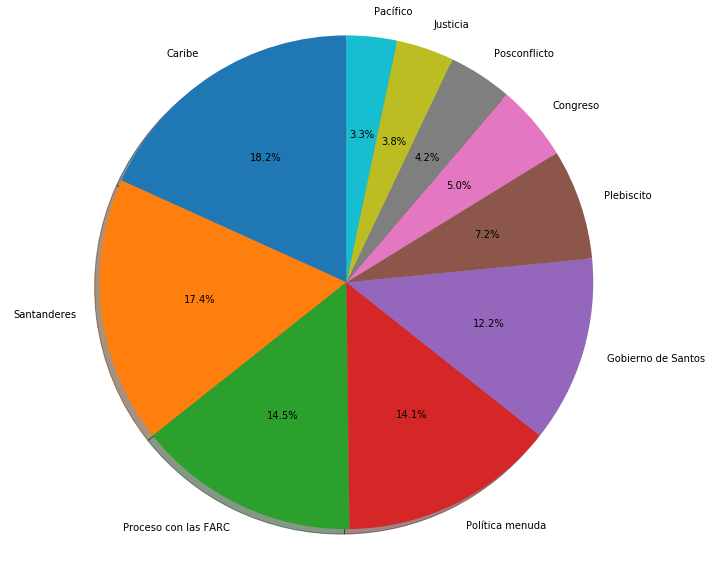

In [21]:
dfV = dfTopic[:10]
matplotlib.rcParams['figure.figsize'] = (12.0,10.0)

labels = dfV['Topic'].values
sizes = dfV['Number_of_Articles'].values
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

plt.show()

## 10 Autores más populares en el tema 'Proceso con las FARC'

In [30]:
dfFARC = %cypher MATCH (t:Topic{topic:'Proceso con las FARC'})<-[]-()<-[]-(n:Author) RETURN n.name as Author, count(t) as Number_of_Articles ORDER BY Number_of_Articles DESC LIMIT 10
dfFARC = dfFARC.get_dataframe() 
dfFARC

10 rows affected.


,Author,Number_of_Articles
0,Juanita León,36
1,LaSillaVacia.com,34
2,Juanita Vélez,19
3,Juan Esteban Lewin,16
4,Jineth Prieto,15
5,Héctor Riveros,14
6,Laura Ardila Arrieta,8
7,Ana Karietna León Quiroga,8
8,Natalia Arenas,8
9,Daniel Morelo,7


## Temas más populares por secciones 

## 10 Autores más populares en el tema 'Plebiscito'

In [31]:
dfFARC1 = %cypher MATCH (t:Topic{topic:'Plebiscito'})<-[]-()<-[]-(n:Author) RETURN n.name as Author, count(t) as Number_of_Articles ORDER BY Number_of_Articles DESC LIMIT 10
dfFARC1 = dfFARC1.get_dataframe() 
dfFARC1

10 rows affected.


,Author,Number_of_Articles
0,Juanita León,21
1,LaSillaVacia.com,16
2,Jineth Prieto,11
3,Juan Esteban Lewin,9
4,Laura Ardila Arrieta,8
5,Juanita Vélez,8
6,Natalia Arenas,8
7,Antonio Canchila García,6
8,Héctor Riveros,6
9,Ana Karietna León Quiroga,6


## 10 Autores más populares en el tema 'Posconflicto'

In [32]:
dfFARC2 = %cypher MATCH (t:Topic{topic:'Posconflicto'})<-[]-()<-[]-(n:Author) RETURN n.name as Author, count(t) as Number_of_Articles ORDER BY Number_of_Articles DESC LIMIT 10
dfFARC2 = dfFARC2.get_dataframe() 
dfFARC2

10 rows affected.


,Author,Number_of_Articles
0,Juanita Vélez,9
1,Juanita León,9
2,Jineth Prieto,5
3,Juan Esteban Lewin,3
4,Ana Karietna León Quiroga,3
5,Héctor Riveros,3
6,Tatiana Duque,3
7,LaSillaVacia.com,2
8,Antonio Canchila García,2
9,Andrea Nocove Marín,2


## Temas más comentados

In [37]:
dfComments = %cypher MATCH (t:Topic)<-[]-()<-[]-(n:Comment) RETURN t.topic as Topic, count(n.cid) as Comments ORDER BY Comments DESC LIMIT 10
dfComments = dfComments.get_dataframe() 
dfComments

10 rows affected.


,Topic,Comments
0,Proceso con las FARC,1662
1,Gobierno de Santos,1248
2,Plebiscito,1106
3,Caribe,968
4,Santanderes,942
5,Álvaro Uribe,383
6,Posconflicto,375
7,Presidenciales 2018,337
8,Bogotá,334
9,Congreso,311


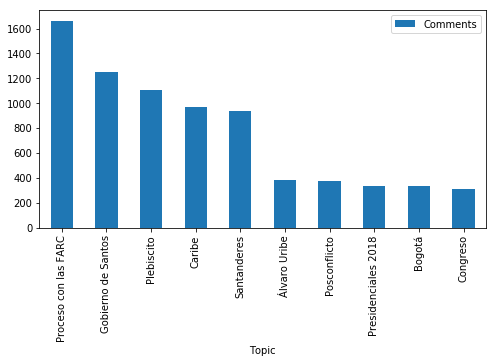

In [42]:
matplotlib.rcParams['figure.figsize'] = (8.0,4.0)
dfComments.set_index('Topic').plot(kind='bar')

## Frecuencia de los temas más relacionados al proceso de Paz

In [59]:
dfFreq = %cypher MATCH (t:Topic)<-[]-(n:Article) WHERE t.topic IN ['Proceso con las FARC', 'Plebiscito', 'Posconflicto', 'Justicia', 'Conflicto Armado', 'Proceso con el ELN', 'Víctimas'] RETURN n.hid as ID, n.date as Date, t.topic as Topic
dfFreq = dfFreq.get_dataframe() 
times = dfFreq.Date.apply(lambda x: datetime.datetime.strptime(x.replace('de Enero de', '01').replace('de Febrero de', '02').replace('de Marzo de', '03').replace('de Abril de', '04').replace('de Mayo de', '05').replace('de Junio de', '06').replace('de Julio de', '07').replace('de Agosto de', '08').replace('de Septiembre de', '09').replace('de Octubre de', '10').replace('de Noviembre de', '11').replace('de Diciembre de', '12'), "%d %m %Y"))
dfFreq ['Date'] =  times

439 rows affected.


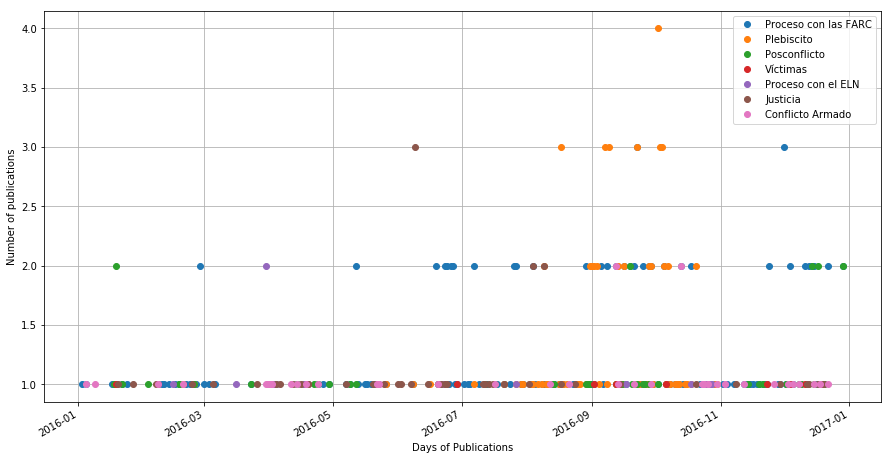

In [122]:
data1 = dfFreq[dfFreq.Topic == 'Proceso con las FARC']
data1 = data1.groupby(data1['Date']).agg({'ID':'count'})
data1.columns = ['Cantidad']
data1 = data1.reset_index()
dataFARC = data1['Cantidad'].values
timesFARC = data1['Date'].values


data2 = dfFreq[dfFreq.Topic == 'Plebiscito']
data2 = data2.groupby(data2['Date']).agg({'ID':'count'})
data2.columns = ['Cantidad']
data2 = data2.reset_index()
dataPlb = data2['Cantidad'].values
timesPleb = data2['Date'].values

data3 = dfFreq[dfFreq.Topic == 'Posconflicto']
data3 = data3.groupby(data3['Date']).agg({'ID':'count'})
data3.columns = ['Cantidad']
data3 = data3.reset_index()
dataPos = data3['Cantidad'].values
timesPos = data3['Date'].values

data4 = dfFreq[dfFreq.Topic == 'Justicia']
data4 = data4.groupby(data4['Date']).agg({'ID':'count'})
data4.columns = ['Cantidad']
data4 = data4.reset_index()
dataJus = data4['Cantidad'].values
timesJus = data4['Date'].values

data5 = dfFreq[dfFreq.Topic == 'Conflicto Armado']
data5 = data5.groupby(data5['Date']).agg({'ID':'count'})
data5.columns = ['Cantidad']
data5 = data5.reset_index()
dataConf = data5['Cantidad'].values
timesConf = data5['Date'].values

data6 = dfFreq[dfFreq.Topic == 'Víctimas']
data6 = data6.groupby(data6['Date']).agg({'ID':'count'})
data6.columns = ['Cantidad']
data6 = data6.reset_index()
dataVic = data6['Cantidad'].values
timesVic = data6['Date'].values

data7 = dfFreq[dfFreq.Topic == 'Proceso con el ELN']
data7 = data7.groupby(data7['Date']).agg({'ID':'count'})
data7.columns = ['Cantidad']
data7 = data7.reset_index()
dataPro = data7['Cantidad'].values
timesPro = data7['Date'].values

fig = plt.figure(figsize=(15.0, 8.0))

plt.plot(timesFARC, dataFARC, label='Proceso con las FARC', lw= 0, marker = 'o')
plt.plot(timesPleb, dataPlb, label='Plebiscito', lw= 0, marker = 'o')
plt.plot(timesPos, dataPos, label='Posconflicto', lw=0, marker = 'o')
plt.plot(timesVic, dataVic, label='Víctimas', lw= 0, marker = 'o')
plt.plot(timesPro, dataPro, label='Proceso con el ELN', lw= 0, marker = 'o')
plt.plot(timesJus, dataJus, label='Justicia', lw= 0, marker = 'o')
plt.plot(timesConf, dataConf, label='Conflicto Armado', lw=0, marker = 'o')

plt.xlabel('Days of Publications')
plt.ylabel('Number of publications')
plt.grid()
plt.legend(loc='upper right')

plt.gcf().autofmt_xdate()

plt.show()